In [1]:
from utils.objects.decision_tree import DecisionTree
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
names = ["Class","cap.shape","cap.surface","cap.color","bruises","odor","gill.attachment","gill.spacing",
         "gill.size","gill.color","stalk.shape","stalk.root","stalk.surface.above.ring",
         "stalk.surface.below.ring","stalk.color.above.ring","stalk.color.below.ring","veil.type","veil.color",
         "ring.number","ring.type","print","population","habitat"]
df = pd.read_csv(url)
df.columns = names

features = df.drop('Class', axis=1)
target = df['Class']

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Encoding features with label encoder
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


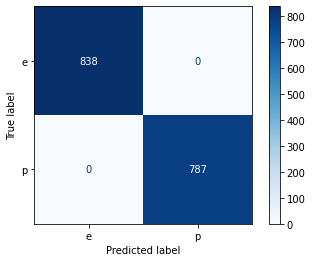

In [5]:
tree_model = DecisionTree(features, target, pos_label='e')
tree_model.encode_features("label")
tree_model.run_pipeline()
tree_model.evaluate_classifier()